In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from itertools import cycle

%matplotlib inline

In [2]:
df = pd.read_csv('../../Datasets/2013_boston_marathon.csv')

# Data Exploration and Cleaning

In [3]:
df.head(15)

25k  age                        name  division    10k gender   half  \
0   49.87   28            Cassidy, Josh R.         9  18.18      M  40.93   
1   77.27   30               Korir, Wesley         5  30.90      M  64.90   
2   77.23   23              Desisa, Lelisa         1  30.90      M  64.92   
3   50.50   32           Fearnley, Kurt H.         5  18.73      M  42.00   
4   48.75   39              Hokinoue, Kota         3  18.18      M  40.57   
5   77.25   28  Gebremariam, Gebregziabher         3  30.88      M  64.92   
6   50.50   42           Soejima, Masazumi         6  18.73      M  41.98   
7   77.23   28              Geneti, Markos         6  30.88      M  64.90   
8   52.62   49             Schabort, Krige        11  19.77      M  43.97   
9   77.25   32               Merga, Deriba        25  30.90      M  64.92   
10  77.25   23                Matebo, Levy        12  30.90      M  64.92   
11  48.75   40           Van Dyk, Ernst F.         2  18.18      M  40.57   
12  52.62   37            Hamerlak, Tomasz        10  19.77      M  43.97   
13  48.75   27              Hug, Marcel E.         4  18.18      M  40.57   
14  77.25   26             Chumba, Dickson         7  30.90      M  64.90   

    official bib  ctz   ...   overall  pace  state    30k     5k genderdiv  \
0      90.90  W1  NaN   ...         9  3.47     ON  62.07   8.90         9   
1     132.50   1  NaN   ...         5  5.07    NaN  92.97  15.90         5   
2     130.37   2  NaN   ...         1  4.98    NaN  92.72  15.93         1   
3      88.43  W2  NaN   ...         5  3.38    NaN  61.35   8.98         5   
4      87.22  W3  NaN   ...         3  3.33    NaN  59.92   8.92         3   
5     130.47   3  NaN   ...         3  4.98    NaN  92.72  15.93         3   
6      90.02  W4  NaN   ...         6  3.43    NaN  61.63   8.98         6   
7     132.73   4  NaN   ...         6  5.07    NaN  92.93  15.90         6   
8      91.78  W5  NaN   ...        11  3.50     GA  64.00   9.38        11   
9     141.67   5  NaN   ...        27  5.42    NaN  92.77  15.93        27   
10    135.70   6  NaN   ...        12  5.18    NaN  92.72  15.92        12   
11     87.20  W6  NaN   ...         2  3.33    NaN  59.92   8.92         2   
12     91.78  W7  NaN   ...        10  3.50    NaN  63.98   9.37        10   
13     88.32  W8  NaN   ...         4  3.38    NaN  60.10   8.93         4   
14    134.13   8  NaN   ...         7  5.12    NaN  92.70  15.90         7   

      20k     35k         city     40k  
0   38.80   74.73      Toronto   85.55  
1   61.52  108.78        Kenya  124.77  
2   61.53  108.68         Ambo  123.78  
3   39.88   73.00     Hamilton   83.43  
4   38.55   71.68       Iizuka   81.88  
5   61.53  108.70       Tigray  123.78  
6   39.87   74.00      Fukuoka   84.67  
7   61.52  109.07  Addis Ababa  125.20  
8   41.77   75.95    Cedartown   86.48  
9   61.53  111.13  Addis Ababa  131.98  
10  61.52  108.68       Kitale  125.50  
11  38.57   71.68        Paarl   81.88  
12  41.70   75.97       Bystra   86.47  
13  38.55   72.62      Nottwil   83.15  
14  61.53  108.68        Nandi  125.27  

[15 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 1.7+ MB


In [5]:
df[~df['40k'].str.contains('-')].head(10)

25k  age                        name  division    10k gender   half  \
0  49.87   28            Cassidy, Josh R.         9  18.18      M  40.93   
1  77.27   30               Korir, Wesley         5  30.90      M  64.90   
2  77.23   23              Desisa, Lelisa         1  30.90      M  64.92   
3  50.50   32           Fearnley, Kurt H.         5  18.73      M  42.00   
4  48.75   39              Hokinoue, Kota         3  18.18      M  40.57   
5  77.25   28  Gebremariam, Gebregziabher         3  30.88      M  64.92   
6  50.50   42           Soejima, Masazumi         6  18.73      M  41.98   
7  77.23   28              Geneti, Markos         6  30.88      M  64.90   
8  52.62   49             Schabort, Krige        11  19.77      M  43.97   
9  77.25   32               Merga, Deriba        25  30.90      M  64.92   

   official bib  ctz   ...   overall  pace  state    30k     5k genderdiv  \
0     90.90  W1  NaN   ...         9  3.47     ON  62.07   8.90         9   
1    132.50   1  NaN   ...         5  5.07    NaN  92.97  15.90         5   
2    130.37   2  NaN   ...         1  4.98    NaN  92.72  15.93         1   
3     88.43  W2  NaN   ...         5  3.38    NaN  61.35   8.98         5   
4     87.22  W3  NaN   ...         3  3.33    NaN  59.92   8.92         3   
5    130.47   3  NaN   ...         3  4.98    NaN  92.72  15.93         3   
6     90.02  W4  NaN   ...         6  3.43    NaN  61.63   8.98         6   
7    132.73   4  NaN   ...         6  5.07    NaN  92.93  15.90         6   
8     91.78  W5  NaN   ...        11  3.50     GA  64.00   9.38        11   
9    141.67   5  NaN   ...        27  5.42    NaN  92.77  15.93        27   

     20k     35k         city     40k  
0  38.80   74.73      Toronto   85.55  
1  61.52  108.78        Kenya  124.77  
2  61.53  108.68         Ambo  123.78  
3  39.88   73.00     Hamilton   83.43  
4  38.55   71.68       Iizuka   81.88  
5  61.53  108.70       Tigray  123.78  
6  39.87   74.00      Fukuoka   84.67  
7  61.52  109.07  Addis Ababa  125.20  
8  41.77   75.95    Cedartown   86.48  
9  61.53  111.13  Addis Ababa  131.98  

[10 rows x 21 columns]

In [6]:
df[df['40k'].str.contains('-')]

25k  age                      name  division    10k gender    half  \
592         -   32   Fischer-Daly, Matthew M       827      -      M       -   
1373        -   37          Prest, Andrew J.      3733      -      M       -   
2349        -   33       Rittenberry, Jordan      3058      -      M       -   
4663   110.28   38         Radcliffe, Torrey      1794  44.50      M   93.32   
5260   110.10   46         Yanagase, Masashi       880  43.17      M   91.72   
5770        -   36  Francisco Javier, Gavela      3248  48.72      M  104.00   
6316   112.43   28          Pulkkinen, Karen       403  44.23      F   94.62   
7177   113.35   46              Coley, Roy W       419  45.80      M   95.93   
7826        -   41          Cecil, Elizabeth      1104      -      F       -   
8497        -   44            Gellel, Ramona        80      -      F       -   
8808        -   45          Catalano, Angelo      1708      -      M       -   
10836       -   23            Kuzma, Chelsea      2811  53.57      F       -   
11142       -   48              Wenjing, Xie       662      -      F       -   
12763       -   36            Lorenzo, Jaime      2674      -      F       -   
12879       -   43          Verbrugge, Staci       327  48.12      F  102.22   
13332       -   57           Kuzma, Steven J       608  53.55      M       -   
14539       -   46       Milligan, Sandra J.       526      -      F       -   

       official    bib  ctz ... overall  pace  state     30k     5k genderdiv  \
592      173.58    736  NaN ...    1114  6.63     NY       -      -      1051   
1373     245.45   1708  NaN ...   16825  9.37     MN       -      -     10274   
2349     209.60   2892  NaN ...    8339  8.00     IL       -      -      6533   
4663     184.40   5648  NaN ...    2759  7.03     CA  132.18  22.40      2559   
5260     203.77   6370  NaN ...    6763  7.78    NaN  136.27  21.73      5593   
5770     218.08   6995  NaN ...   10692  8.33    NaN  150.58  24.17      7631   
6316     194.12   7634  NaN ...    4547  7.42     MA  136.07  21.97       484   
7177     191.43   8699  NaN ...    4015  7.32     FL  136.90  22.95      3644   
7826     241.80   9487  NaN ...   16354  9.23     NJ       -      -      6256   
8497     199.35  10312  NaN ...    5689  7.62     ON       -      -       784   
8808     231.53  10698  AUS ...   14210  8.83    NaN       -      -      9184   
10836    225.40  13184  NaN ...   12717  8.60     GA       -  26.87      4197   
11142    232.25  13546  NaN ...   14350  8.87    NaN       -      -      5104   
12763    223.50  15576  NaN ...   12230  8.53     NY       -      -      3920   
12879    214.13  15718  NaN ...    9584  8.17     WA       -  24.20      2450   
13332    225.40  16311  NaN ...   12715  8.60     GA       -  26.87      8519   
14539    228.30  17818  NaN ...   13395  8.72     BC       -  26.00      4565   

         20k     35k            city 40k  
592        -       -        Brooklyn   -  
1373       -       -         Buffalo   -  
2349       -       -         Chicago   -  
4663   88.50  154.23        Torrance   -  
5260   86.83  164.25     Muko, Kyoto   -  
5770   98.65       -          Madrid   -  
6316   89.77  160.13         Beverly   -  
7177   91.03  159.70        Key West   -  
7826       -       -          Rumson   -  
8497       -       -       Pickering   -  
8808       -       -       Singapore   -  
10836      -       -          Duluth   -  
11142      -       -       Shen Zhen   -  
12763      -       -        New York   -  
12879  96.82       -          Yakima   -  
13332      -       -          Duluth   -  
14539      -       -  Campbell River   -  

[17 rows x 21 columns]

In [7]:
df.ctz.unique()

array([nan, 'MEX', 'USA', 'THA', 'FRA', 'ESP', 'AUS', 'NZL', 'GER', 'JPN',
       'GBR', 'SUI', 'SIN', 'CAN', 'POL', 'ITA', 'VEN', 'TUR', 'KEN',
       'IRL', 'CHN', 'ISR', 'BIH', 'JAM', 'RUS', 'LAT', 'COL', 'RSA',
       'AUT', 'MAS', 'UKR', 'DOM', 'SRI', 'BEL', 'IND', 'POR', 'NED',
       'ISL', 'GUA', 'CAF', 'IRI', 'PER', 'PHI', 'SLO', 'ETH', 'SWE',
       'KOR', 'LTU', 'MAR', 'CMR', 'KSA', 'CZE', 'CRC', 'NEP', 'PAN',
       'LIB', 'ROM', 'DEN', 'NOR', 'ALG', 'ECU', 'HUN', 'GRE', 'CHI',
       'KUW', 'HKG', 'ARG', 'BLR', 'FIN', 'NCA', 'SVK', 'BAH', 'EST',
       'INA', 'TWN', 'GUY'], dtype=object)

In [8]:
df[df['ctz'].isnull()]['country'].unique()

array(['CAN', 'KEN', 'ETH', 'AUS', 'JPN', 'USA', 'RSA', 'POL', 'SUI',
       'ESP', 'FRA', 'ITA', 'ECU', 'RUS', 'MEX', 'GBR', 'DEN', 'NED',
       'CRC', 'ISL', 'IRL', 'GER', 'AUT', 'GRE', 'GUA', 'DOM', 'UKR',
       'SWE', 'NOR', 'SVK', 'BAH', 'BRA', 'KOR', 'VEN', 'CZE', 'HUN',
       'SLO', 'COL', 'PER', 'HKG', 'CHI', 'FIN', 'CHN', 'BEL', 'SIN',
       'ARG', 'URU', 'NZL', 'ISR', 'BER', 'PAN', 'TWN', 'LTU', 'POR',
       'IND', 'MAS', 'TRI', 'EST', 'CAY', 'ESA', 'ARU', 'QAT'],
      dtype=object)

In [9]:
df[df['ctz'] == 'USA']['country'].unique()

array(['CAN', 'BER', 'BRA', 'GBR', 'IRL', 'CZE', 'ECU', 'IND', 'JPN',
       'COL', 'GUA', 'SUI', 'FRA', 'AUS', 'CHN', 'GER', 'SIN', 'VGB',
       'CRC', 'ESP', 'BOL', 'TUR'], dtype=object)

In [10]:
df[~df['state'].isnull()]['country'].unique()

array(['CAN', 'USA', 'MEX'], dtype=object)

In [11]:
df[df['state'].isnull()]['country'].unique()

array(['KEN', 'ETH', 'AUS', 'JPN', 'RSA', 'POL', 'SUI', 'ESP', 'FRA',
       'ITA', 'ECU', 'RUS', 'MEX', 'BER', 'GBR', 'DEN', 'NED', 'CRC',
       'ISL', 'IRL', 'GER', 'AUT', 'GRE', 'GUA', 'DOM', 'UKR', 'SWE',
       'NOR', 'SVK', 'BAH', 'BRA', 'HKG', 'KOR', 'VEN', 'CZE', 'HUN',
       'SLO', 'COL', 'PER', 'SIN', 'CHI', 'FIN', 'CHN', 'BEL', 'ARG',
       'UAE', 'URU', 'NZL', 'ISR', 'PAN', 'TWN', 'LTU', 'IND', 'POR',
       'MAS', 'CAY', 'EST', 'TRI', 'ESA', 'PHI', 'VGB', 'ARU', 'QAT',
       'TCA', 'BOL', 'TUR'], dtype=object)

In [12]:
df[df['city'].isnull()][['ctz', 'country', 'state', 'city']]

ctz country state city
10138  GBR     ARG   NaN  NaN

In [13]:
df.gender.unique()

array(['M', 'F'], dtype=object)

In [14]:
sns.set_style('white')

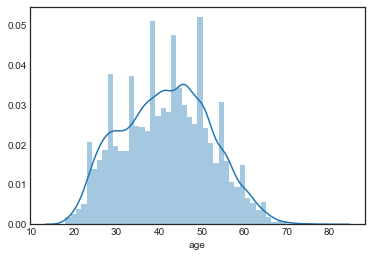

In [15]:
sns.distplot(df[~df['40k'].str.contains('-')].age)

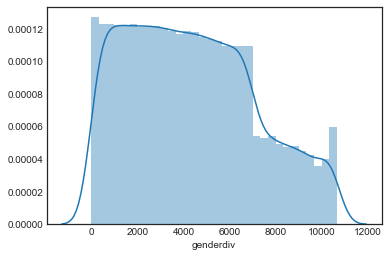

In [16]:
sns.distplot(df[~df['40k'].str.contains('-')].genderdiv)

In [17]:
# only interested in people who completed running the boston marathon
df_clean = pd.DataFrame(df)
df_clean = df_clean[~df_clean['40k'].str.contains('-')]
df_clean = df_clean[~df_clean['35k'].str.contains('-')]
df_clean = df_clean[~df_clean['30k'].str.contains('-')]
df_clean = df_clean[~df_clean['25k'].str.contains('-')]
df_clean = df_clean[~df_clean['20k'].str.contains('-')]
df_clean = df_clean[~df_clean['half'].str.contains('-')]
df_clean = df_clean[~df_clean['10k'].str.contains('-')]
df_clean = df_clean[~df_clean['5k'].str.contains('-')]

In [18]:
df_clean.head()

25k  age               name  division    10k gender   half  official bib  \
0  49.87   28   Cassidy, Josh R.         9  18.18      M  40.93     90.90  W1   
1  77.27   30      Korir, Wesley         5  30.90      M  64.90    132.50   1   
2  77.23   23     Desisa, Lelisa         1  30.90      M  64.92    130.37   2   
3  50.50   32  Fearnley, Kurt H.         5  18.73      M  42.00     88.43  W2   
4  48.75   39     Hokinoue, Kota         3  18.18      M  40.57     87.22  W3   

   ctz   ...   overall  pace  state    30k     5k genderdiv    20k     35k  \
0  NaN   ...         9  3.47     ON  62.07   8.90         9  38.80   74.73   
1  NaN   ...         5  5.07    NaN  92.97  15.90         5  61.52  108.78   
2  NaN   ...         1  4.98    NaN  92.72  15.93         1  61.53  108.68   
3  NaN   ...         5  3.38    NaN  61.35   8.98         5  39.88   73.00   
4  NaN   ...         3  3.33    NaN  59.92   8.92         3  38.55   71.68   

       city     40k  
0   Toronto   85.55  
1     Kenya  124.77  
2      Ambo  123.78  
3  Hamilton   83.43  
4    Iizuka   81.88  

[5 rows x 21 columns]

In [19]:
df_clean.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k',
       'genderdiv', '20k', '35k', 'city', '40k'],
      dtype='object')

In [20]:
df_clean['CAN'] = np.where(df_clean.country == 'CAN', 1, 0)

In [21]:
df_clean = df_clean[['age', 'official', 'overall', 'CAN', 'gender', 'pace', 'division', 'genderdiv', '5k', '10k', 'half', '20k', '25k', '30k', '35k', '40k']]

In [22]:
df_clean['gender'] = np.where(df_clean['gender'] == 'M', 0, 1)

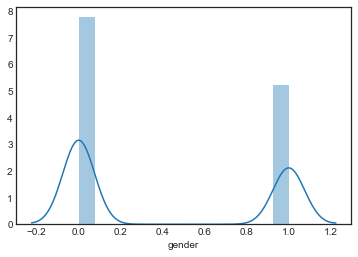

In [23]:
sns.distplot(df_clean.gender)

In [24]:
df_clean[['pace', '5k', '10k', 'half', '20k', '25k', '30k', '35k', '40k']] = df_clean[['pace', '5k', '10k', 'half', '20k', '25k', '30k', '35k', '40k']].astype(float)
df_clean['gender'] = df_clean.gender.astype(int)

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16054 entries, 0 to 16163
Data columns (total 16 columns):
age          16054 non-null int64
gender       16054 non-null int32
official     16054 non-null float64
overall      16054 non-null int64
CAN          16054 non-null int32
pace         16054 non-null float64
division     16054 non-null int64
genderdiv    16054 non-null int64
5k           16054 non-null float64
10k          16054 non-null float64
half         16054 non-null float64
20k          16054 non-null float64
25k          16054 non-null float64
30k          16054 non-null float64
35k          16054 non-null float64
40k          16054 non-null float64
dtypes: float64(10), int32(2), int64(4)
memory usage: 2.0 MB


In [26]:
df_clean.head()

age  gender  official  overall  CAN  pace  division  genderdiv     5k  \
0   28       0     90.90        9    1  3.47         9          9   8.90   
1   30       0    132.50        5    0  5.07         5          5  15.90   
2   23       0    130.37        1    0  4.98         1          1  15.93   
3   32       0     88.43        5    0  3.38         5          5   8.98   
4   39       0     87.22        3    0  3.33         3          3   8.92   

     10k   half    20k    25k    30k     35k     40k  
0  18.18  40.93  38.80  49.87  62.07   74.73   85.55  
1  30.90  64.90  61.52  77.27  92.97  108.78  124.77  
2  30.90  64.92  61.53  77.23  92.72  108.68  123.78  
3  18.73  42.00  39.88  50.50  61.35   73.00   83.43  
4  18.18  40.57  38.55  48.75  59.92   71.68   81.88

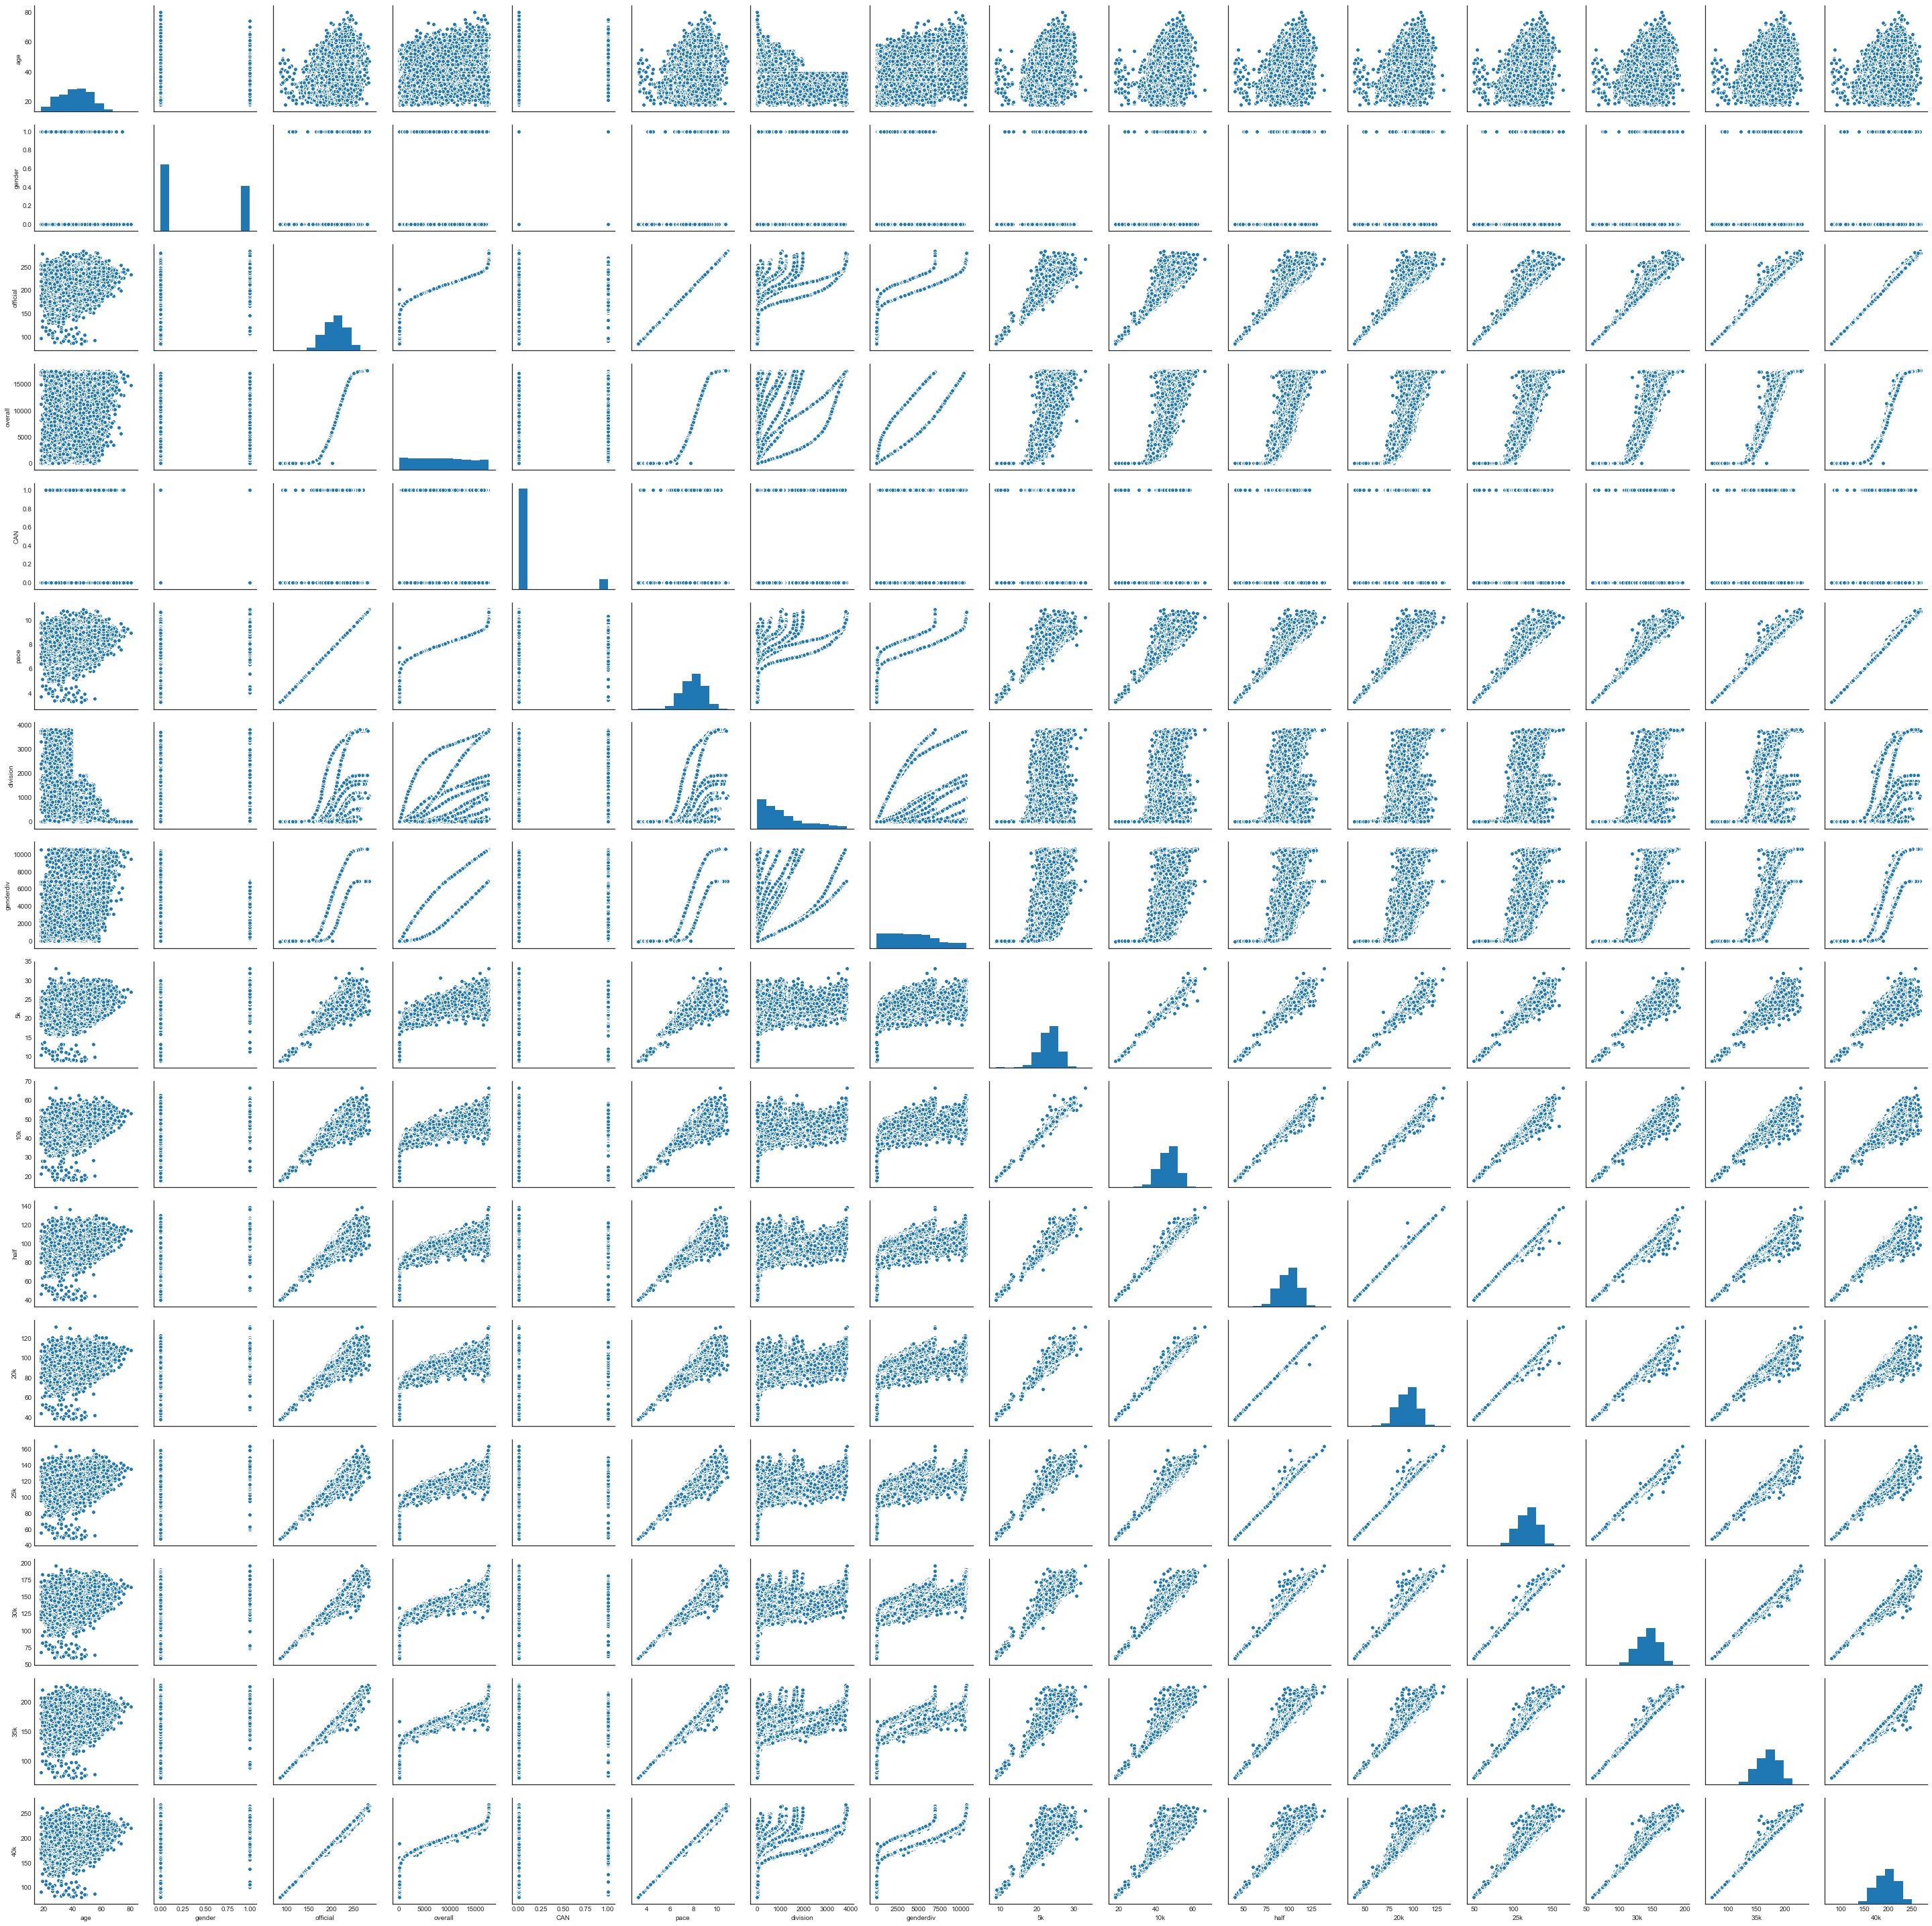

In [27]:
sns.pairplot(df_clean)

# Exploring Cluster Techniques

In [28]:
dfc = pd.DataFrame(df_clean)

In [29]:
def runCluster(cluster_type, df, classifier, cluster_size, X_type):
    # Break into a set of features and a variable for the known outcome.
    X = df.loc[:, ~df.columns.isin([classifier])]
    y = df[classifier]
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=42)

    # Normalize
    X_norm = normalize(X)

    # Create the two-feature PCA for graphing purposes.
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_norm)

    # Designate which cluster to use
    if (X_type == 'pca'):
        if (cluster_type == 'KMeans'):
            y_pred = KMeans(n_clusters=cluster_size).fit_predict(X_pca)
        elif (cluster_type == 'MeanShift'):
            y_pred = MeanShift(bin_seeding=True).fit_predict(X_pca)
        elif (cluster_type == 'Spectral'):
            y_pred = SpectralClustering(n_clusters=cluster_size).fit_predict(X_pca)
        elif (cluster_type == 'Affinity'):
            y_pred = AffinityPropagation().fit_predict(X_pca)
        # Plot the solution.
        if (cluster_size > 0):
            print('With {} clusters'.format(cluster_size))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    elif (X_type == 'train'):
        if (cluster_type == 'KMeans'):
            y_pred = KMeans(n_clusters=cluster_size).fit_predict(X_train)
        elif (cluster_type == 'MeanShift'):
            bandwidth = estimate_bandwidth(X_train, quantile=.2, n_samples=500)
            y_pred = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit_predict(X_train)
        elif (cluster_type == 'Spectral'):
            y_pred = SpectralClustering(n_clusters=cluster_size).fit_predict(X_train)
        elif (cluster_type == 'Affinity'):
            y_pred = AffinityPropagation().fit_predict(X_train)
        # Plot the solution.
        if (cluster_size > 0):
            print('With {} clusters'.format(cluster_size))
        plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_pred)
    plt.show()
    
    # Check the solution against the data.
    print('Comparing clusters against the data:')
    if (X_type == 'pca'):
        print(pd.crosstab(y_pred, y))
    elif (X_type == 'train'):
        print(pd.crosstab(y_pred, y_train))

-------------------- K Means PCA --------------------
With 2 clusters


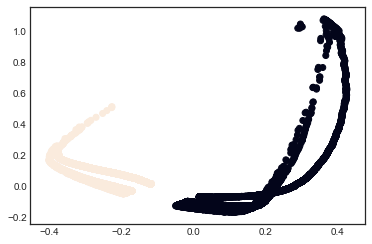

Comparing clusters against the data:
gender     0     1
row_0             
0       9608     9
1          0  6437
With 3 clusters


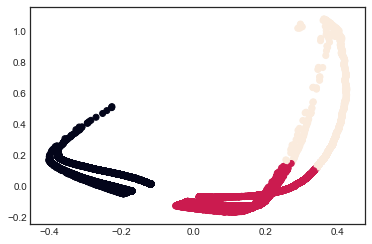

Comparing clusters against the data:
gender     0     1
row_0             
0          0  6437
1       8596     0
2       1012     9
With 4 clusters


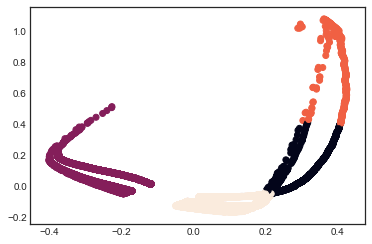

Comparing clusters against the data:
gender     0     1
row_0             
0       2655     0
1          0  6437
2        355     9
3       6598     0
With 5 clusters


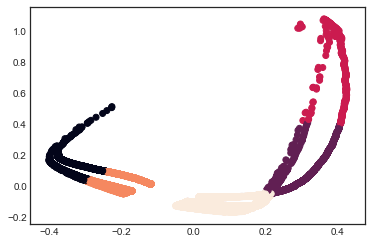

Comparing clusters against the data:
gender     0     1
row_0             
0          0  2055
1       2655     0
2        355     9
3          0  4382
4       6598     0
With 6 clusters


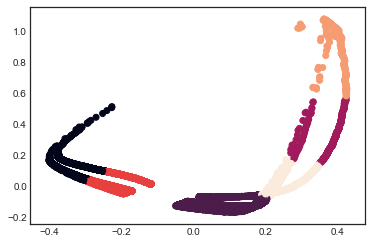

Comparing clusters against the data:
gender     0     1
row_0             
0          0  2054
1       6386     0
2        625     0
3          0  4383
4        247     9
5       2350     0


In [30]:
#dataframe, classifier, number of clusters
print('-'*20,'K Means PCA','-'*20)
for i in range(2, 7):
    runCluster('KMeans', dfc, 'gender', i, 'pca')

-------------------- K Means X_train --------------------
With 2 clusters


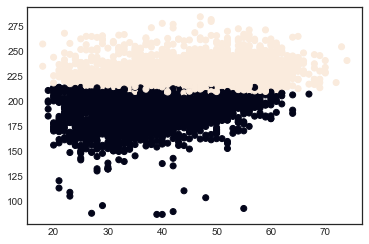

Comparing clusters against the data:
gender     0     1
row_0             
0       1811   709
1       1026  1270
With 3 clusters


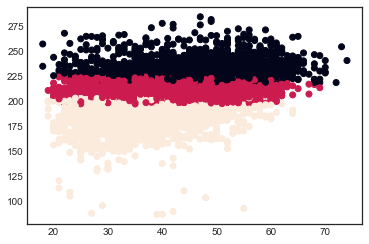

Comparing clusters against the data:
gender     0    1
row_0            
0        679  778
1        860  885
2       1298  316
With 4 clusters


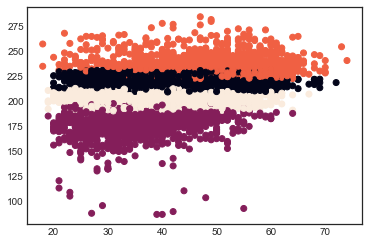

Comparing clusters against the data:
gender    0    1
row_0           
0       451  803
1       998  176
2       541  524
3       847  476
With 5 clusters


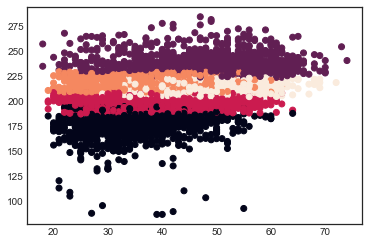

Comparing clusters against the data:
gender    0    1
row_0           
0       854  137
1       512  582
2       794  335
3         0  925
4       677    0
With 6 clusters


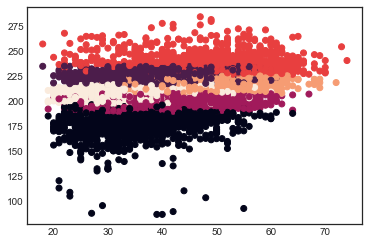

Comparing clusters against the data:
gender    0    1
row_0           
0       956  167
1         0  744
2       845    0
3       444  382
4       592    0
5         0  686


In [31]:
#dataframe, classifier, number of clusters
print('-'*20,'K Means X_train','-'*20)
for i in range(2, 7):
    runCluster('KMeans', dfc, 'gender', i, 'train')

-------------------- Mean Shift --------------------


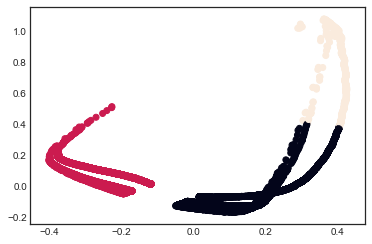

Comparing clusters against the data:
gender     0     1
row_0             
0       9238     0
1          0  6437
2        370     9


In [32]:
#dataframe, classifier
print('-'*20,'Mean Shift','-'*20)
runCluster('MeanShift', dfc, 'gender', 0, 'pca')

-------------------- Mean Shift --------------------


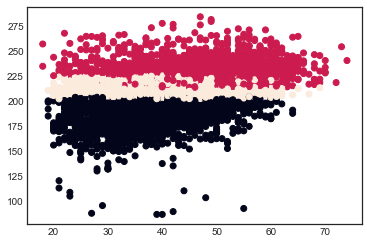

Comparing clusters against the data:
gender     0    1
row_0            
0       1537  363
1        829  740
2        471  876


In [33]:
print('-'*20,'Mean Shift','-'*20)
runCluster('MeanShift', dfc, 'gender', 0, 'train')

-------------------- Spectral --------------------
With 2 clusters


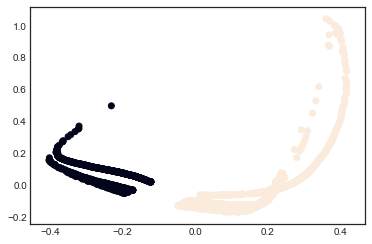

Comparing clusters against the data:
gender     0     1
row_0             
0          0  1073
1       1602     0
With 3 clusters


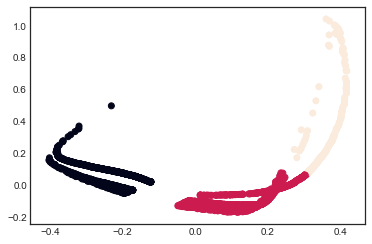

Comparing clusters against the data:
gender     0     1
row_0             
0          0  1073
1       1358     0
2        244     0
With 4 clusters


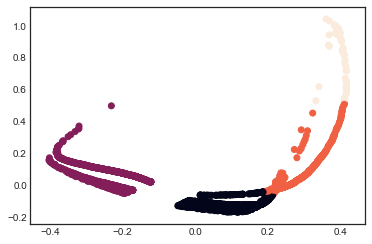

Comparing clusters against the data:
gender     0     1
row_0             
0       1096     0
1          0  1073
2        460     0
3         46     0
With 5 clusters


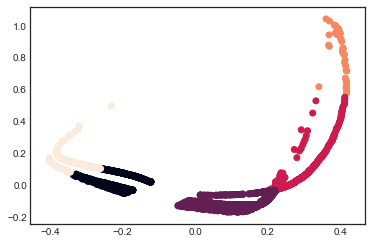

Comparing clusters against the data:
gender     0    1
row_0            
0          0  806
1       1124    0
2        436    0
3         42    0
4          0  267


In [34]:
# smaller dataest for more intensive clustering methods
dfc_reduced = pd.DataFrame(dfc)
rows = (int)(dfc_reduced.shape[0] / 6)
dfc_reduced = dfc_reduced.sample(n=rows)

#dataframe, classifier, number of clusters
print('-'*20,'Spectral','-'*20)
for i in range(2, 6):
    runCluster('Spectral', dfc_reduced, 'gender', i, 'pca')

In [35]:
# 4 clusters appear best for spectral

-------------------- Spectral --------------------
With 2 clusters


c:\users\madga\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


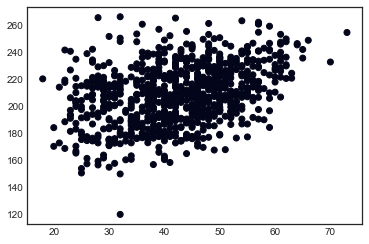

Comparing clusters against the data:
gender    0    1
row_0           
0       487  313
1         0    2
With 3 clusters


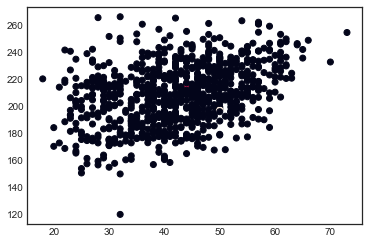

Comparing clusters against the data:
gender    0    1
row_0           
0       485  313
1         0    2
2         2    0
With 4 clusters


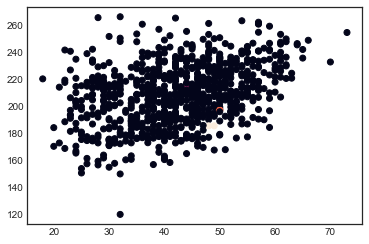

Comparing clusters against the data:
gender    0    1
row_0           
0       483  313
1         0    2
2         2    0
3         2    0
With 5 clusters


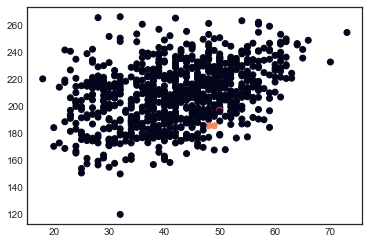

Comparing clusters against the data:
gender    0    1
row_0           
0       481  313
1         0    2
2         2    0
3         2    0
4         2    0


In [36]:
#dataframe, classifier, number of clusters
print('-'*20,'Spectral','-'*20)
for i in range(2, 6):
    runCluster('Spectral', dfc_reduced, 'gender', i, 'train')

-------------------- Affinity --------------------


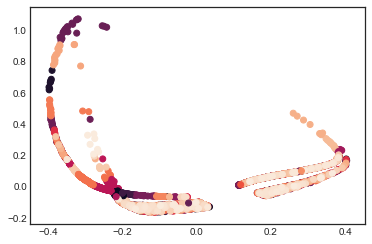

Comparing clusters against the data:
gender  0  1
row_0       
0       1  0
1       1  0
2       0  1
3       0  1
4       1  0
5       1  0
6       0  1
7       1  0
8       1  0
9       1  0
10      0  1
11      1  0
12      1  0
13      1  0
14      1  0
15      0  1
16      1  0
17      0  1
18      1  0
19      0  1
20      1  0
21      0  1
22      0  1
23      1  0
24      0  1
25      1  0
26      1  0
27      1  0
28      0  1
29      0  1
...    .. ..
2476    0  1
2477    0  1
2478    0  1
2479    0  1
2480    1  0
2481    1  0
2482    1  0
2483    1  0
2484    0  1
2485    0  1
2486    1  0
2487    0  1
2488    0  1
2489    0  1
2490    0  1
2491    0  1
2492    1  0
2493    0  1
2494    1  0
2495    1  0
2496    7  0
2497    0  1
2498    1  0
2499    0  1
2500    0  1
2501    0  1
2502    0  1
2503    1  0
2504    0  1
2505    1  0

[2506 rows x 2 columns]


In [37]:
# reduce dataset due to memory
dfc_reduced = pd.DataFrame(dfc)
rows = (int)(dfc_reduced.shape[0] / 5)
dfc_reduced = dfc_reduced.sample(n=rows)

print('-'*20,'Affinity','-'*20)
runCluster('Affinity', dfc_reduced, 'gender', 0, 'pca')

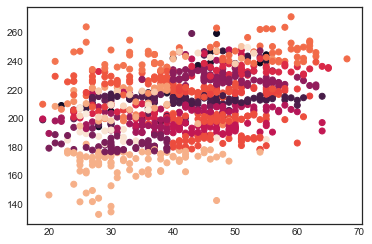

Comparing clusters against the data:
gender   0   1
row_0         
0        0   1
1        0   1
2        0   1
3        0   1
4        0   1
5        0   1
6        0   1
7        0   1
8        0   1
9        0   1
10       0   1
11       0   1
12       0   1
13       0   1
14       0   1
15       0   3
16       0   1
17       0   1
18       0   1
19       0   1
20       0   1
21       0   1
22       0   1
23       0   1
24       0   1
25       0   1
26       0   1
27       0   1
28       0   1
29       0   1
...     ..  ..
147      0   1
148      0   1
149     76  11
150      0   1
151      0   1
152      0   1
153      0   1
154      0   1
155      0   1
156      0   1
157      0   1
158      0   1
159      0   1
160      0   7
161      0   2
162      0   1
163      0   1
164      0   1
165      0   1
166      0   1
167      0   1
168      0   1
169      0   1
170      0   1
171      0   1
172      0  16
173      0   1
174      0   1
175      0   1
176      0   1

[177 rows x 2 col

In [38]:
runCluster('Affinity', dfc_reduced, 'gender', 0, 'train')

# Gender may not be possible to detect with the data at hand. Test for runners from canada

In [75]:
dfc.columns

Index(['age', 'gender', 'official', 'overall', 'CAN', 'pace', 'division',
       'genderdiv', '5k', '10k', 'half', '20k', '25k', '30k', '35k', '40k'],
      dtype='object')

In [77]:
dfc = dfc[['age', 'official', 'overall', 'CAN', 'gender', 'pace', 'division', 'genderdiv', '5k', '10k', 'half', '20k', '25k', '30k', '35k', '40k']]

-------------------- K Means X_train --------------------
With 2 clusters


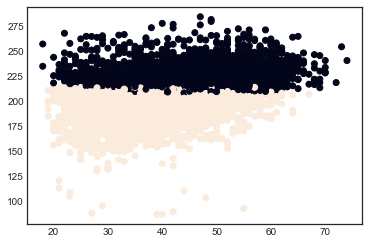

Comparing clusters against the data:
CAN       0    1
row_0           
0      2045  251
1      2317  203
With 3 clusters


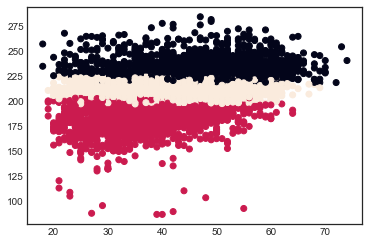

Comparing clusters against the data:
CAN       0    1
row_0           
0      1296  161
1      1485  129
2      1581  164
With 4 clusters


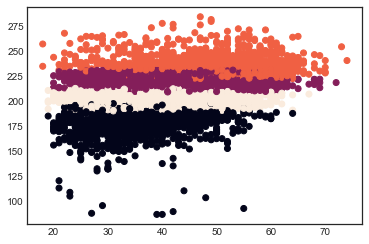

Comparing clusters against the data:
CAN       0    1
row_0           
0      1079   96
1      1119  138
2       939  118
3      1225  102


In [79]:
print('-'*20,'K Means X_train','-'*20)
for i in range(2, 5):
    runCluster('KMeans', dfc, 'CAN', i, 'train')

-------------------- Mean Shift --------------------


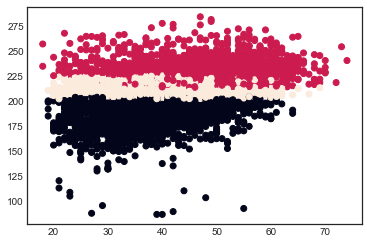

Comparing clusters against the data:
CAN       0    1
row_0           
0      1751  149
1      1393  176
2      1218  129


In [80]:
print('-'*20,'Mean Shift','-'*20)
runCluster('MeanShift', dfc, 'CAN', 0, 'train')

-------------------- Spectral --------------------
With 2 clusters


c:\users\madga\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


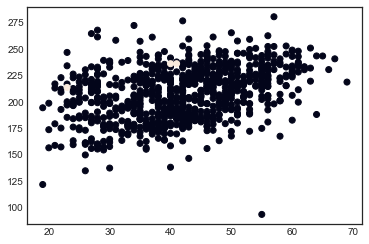

Comparing clusters against the data:
CAN      0   1
row_0         
0      727  71
1        4   0
With 3 clusters


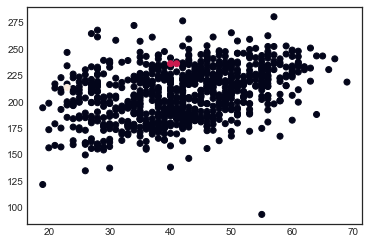

Comparing clusters against the data:
CAN      0   1
row_0         
0      727  71
1        2   0
2        2   0
With 4 clusters


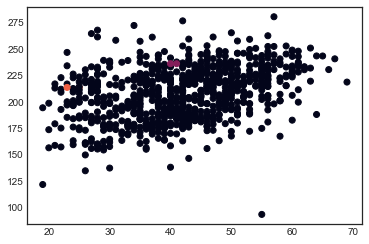

Comparing clusters against the data:
CAN      0   1
row_0         
0      725  71
1        2   0
2        2   0
3        2   0


In [81]:
# smaller dataest for more intensive clustering methods
dfc_reduced = pd.DataFrame(dfc)
rows = (int)(dfc_reduced.shape[0] / 6)
dfc_reduced = dfc_reduced.sample(n=rows)

#dataframe, classifier, number of clusters
print('-'*20,'Spectral','-'*20)
for i in range(2, 5):
    runCluster('Spectral', dfc_reduced, 'CAN', i, 'train')

-------------------- Affinity --------------------


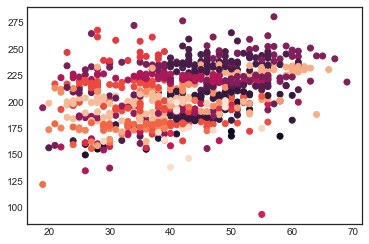

Comparing clusters against the data:
CAN     0  1
row_0       
0       0  1
1       1  0
2       1  0
3       1  0
4       1  0
5       1  0
6       1  0
7       1  0
8       1  0
9       1  0
10      0  1
11      1  0
12      1  0
13      1  0
14      1  0
15      1  0
16      1  0
17      1  0
18      1  0
19      1  0
20     19  2
21     11  0
22     22  3
23      2  0
24      1  0
25      1  0
26      1  0
27     37  4
28      1  0
29      1  0
...    .. ..
119     2  0
120     1  0
121     1  0
122     1  0
123     1  0
124    40  2
125     6  1
126     1  0
127     1  0
128     1  0
129    25  3
130    43  4
131     1  0
132     3  0
133     1  0
134     1  0
135     1  0
136     1  0
137     1  0
138     1  0
139     1  0
140     1  0
141     5  0
142     1  0
143     1  0
144     1  0
145     1  0
146     1  0
147     1  0
148     1  0

[149 rows x 2 columns]


In [83]:
print('-'*20,'Affinity','-'*20)
runCluster('Affinity', dfc_reduced, 'CAN', 0, 'train')

# Results for gender was inconsistent, but in determining whether someone is from Canada, Spectral Clustering appears to work best.